Data source location- https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2

Data was created on April 16, 2019. So, the data analysis has been performed from Apr 2019 to Oct 2020.


In [1]:
pwd

'/Users/swethasridhar/Desktop/Programming/Project 2'

In [2]:
pip install plotly

You should consider upgrading via the '/Users/swethasridhar/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)


# Loading the data file

In [4]:
missing_value= ["N/a", "na", np.nan]
file= pd.read_csv('Electric_Vehicle_Population_Data.csv', engine='python', na_values= missing_value) 
file

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,JA4J24A5XJ,King,KENT,WA,98032,2018,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,34595,33.0,245053693,POINT (-122.26132099999998 47.390601)
1,JN1AZ0CP7B,King,COVINGTON,WA,98042,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,47.0,265513174,POINT (-122.11667400000002 47.363112)
2,1G1FW6S07H,Clark,CAMAS,WA,98607,2017,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,37495,18.0,8930036,POINT (-122.40849800000001 45.620943)
3,1N4AZ0CP6D,King,SEATTLE,WA,98117,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,28800,36.0,182911767,POINT (-122.379354 47.687571)
4,JN1AZ0CP1B,Clark,CAMAS,WA,98607,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,18.0,247761594,POINT (-122.40849800000001 45.620943)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60923,5YJ3E1EC7L,King,SEATTLE,WA,98119,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,36.0,2058654,POINT (-122.36772100000002 47.639264)
60924,KNAGU4LE4K,Pierce,BONNEY LAKE,WA,98391,2019,KIA,OPTIMA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,35390,31.0,475848831,POINT (-122.170798 47.184615)
60925,1G1RA6E42C,San Juan,EASTSOUND,WA,98245,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,39145,40.0,230905013,POINT (-122.924946 48.657249)
60926,WBY8P6C05L,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,107306202,POINT (-122.303413 47.61065)


In [5]:
#Number of rows and columns
file.shape

(60928, 15)

In [6]:
file.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
ZIP Code                                               int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
dtype: object

# **Data Cleaning**

In [7]:
file.isnull().sum(axis = 0)  

VIN (1-10)                                            0
County                                                1
City                                                  0
State                                                 0
ZIP Code                                              0
Model Year                                            0
Make                                                  0
Model                                                 0
Electric Vehicle Type                                 0
Clean Alternative Fuel Vehicle (CAFV) Eligibility     0
Electric Range                                        0
Base MSRP                                             0
Legislative District                                 39
DOL Vehicle ID                                        0
Vehicle Location                                      2
dtype: int64

In [8]:
file.isnull().any()

VIN (1-10)                                           False
County                                                True
City                                                 False
State                                                False
ZIP Code                                             False
Model Year                                           False
Make                                                 False
Model                                                False
Electric Vehicle Type                                False
Clean Alternative Fuel Vehicle (CAFV) Eligibility    False
Electric Range                                       False
Base MSRP                                            False
Legislative District                                  True
DOL Vehicle ID                                       False
Vehicle Location                                      True
dtype: bool

In [9]:
file.isna()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60923,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60924,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60925,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60926,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**The row with null values in the column County**

In [10]:
file[file['County'].isnull()].index.tolist()

[32529]

**Filling the missing values with 0**

In [11]:
file.fillna(0)

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,JA4J24A5XJ,King,KENT,WA,98032,2018,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,34595,33.0,245053693,POINT (-122.26132099999998 47.390601)
1,JN1AZ0CP7B,King,COVINGTON,WA,98042,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,47.0,265513174,POINT (-122.11667400000002 47.363112)
2,1G1FW6S07H,Clark,CAMAS,WA,98607,2017,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,37495,18.0,8930036,POINT (-122.40849800000001 45.620943)
3,1N4AZ0CP6D,King,SEATTLE,WA,98117,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,28800,36.0,182911767,POINT (-122.379354 47.687571)
4,JN1AZ0CP1B,Clark,CAMAS,WA,98607,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,18.0,247761594,POINT (-122.40849800000001 45.620943)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60923,5YJ3E1EC7L,King,SEATTLE,WA,98119,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,36.0,2058654,POINT (-122.36772100000002 47.639264)
60924,KNAGU4LE4K,Pierce,BONNEY LAKE,WA,98391,2019,KIA,OPTIMA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,35390,31.0,475848831,POINT (-122.170798 47.184615)
60925,1G1RA6E42C,San Juan,EASTSOUND,WA,98245,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,39145,40.0,230905013,POINT (-122.924946 48.657249)
60926,WBY8P6C05L,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,107306202,POINT (-122.303413 47.61065)


# **Data Analysis**

**Descriptive statistics of the data**

In [12]:
file.info

<bound method DataFrame.info of        VIN (1-10)     County         City State  ZIP Code  Model Year  \
0      JA4J24A5XJ       King         KENT    WA     98032        2018   
1      JN1AZ0CP7B       King    COVINGTON    WA     98042        2011   
2      1G1FW6S07H      Clark        CAMAS    WA     98607        2017   
3      1N4AZ0CP6D       King      SEATTLE    WA     98117        2013   
4      JN1AZ0CP1B      Clark        CAMAS    WA     98607        2011   
...           ...        ...          ...   ...       ...         ...   
60923  5YJ3E1EC7L       King      SEATTLE    WA     98119        2020   
60924  KNAGU4LE4K     Pierce  BONNEY LAKE    WA     98391        2019   
60925  1G1RA6E42C   San Juan    EASTSOUND    WA     98245        2012   
60926  WBY8P6C05L       King      SEATTLE    WA     98122        2020   
60927  JN1AZ0CP6B  Snohomish      EVERETT    WA     98208        2011   

             Make                  Model  \
0      MITSUBISHI              OUTLANDER   
1  

In [13]:
file.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location'],
      dtype='object')

**Numeric datatypes in the dataframe**

In [14]:
file.select_dtypes(include=['number'])

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,98032,2018,22,34595,33.0,245053693
1,98042,2011,73,32780,47.0,265513174
2,98607,2017,238,37495,18.0,8930036
3,98117,2013,75,28800,36.0,182911767
4,98607,2011,73,32780,18.0,247761594
...,...,...,...,...,...,...
60923,98119,2020,308,0,36.0,2058654
60924,98391,2019,29,35390,31.0,475848831
60925,98245,2012,35,39145,40.0,230905013
60926,98122,2020,153,0,37.0,107306202


**Categorical datatypes in the dataframe**

In [15]:
file.select_dtypes(include=['object'])

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location
0,JA4J24A5XJ,King,KENT,WA,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.26132099999998 47.390601)
1,JN1AZ0CP7B,King,COVINGTON,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.11667400000002 47.363112)
2,1G1FW6S07H,Clark,CAMAS,WA,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.40849800000001 45.620943)
3,1N4AZ0CP6D,King,SEATTLE,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.379354 47.687571)
4,JN1AZ0CP1B,Clark,CAMAS,WA,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.40849800000001 45.620943)
...,...,...,...,...,...,...,...,...,...
60923,5YJ3E1EC7L,King,SEATTLE,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.36772100000002 47.639264)
60924,KNAGU4LE4K,Pierce,BONNEY LAKE,WA,KIA,OPTIMA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,POINT (-122.170798 47.184615)
60925,1G1RA6E42C,San Juan,EASTSOUND,WA,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.924946 48.657249)
60926,WBY8P6C05L,King,SEATTLE,WA,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.303413 47.61065)


**Unique number of model year of the cars**

In [16]:
model_year=file['Model Year'].unique()
model_year

array([2018, 2011, 2017, 2013, 2014, 2015, 2016, 2019, 2020, 2012, 1997,
       2002, 2008, 1993, 1999, 2000, 1998, 2021, 2010])

**An array of Model names**

In [17]:
model=file['Model'].unique()
model

array(['OUTLANDER', 'LEAF', 'BOLT', 'VOLT', 'I3', 'MODEL S',
       'PRIUS PRIME', 'SOUL', 'MODEL 3', 'MODEL X', 'FUSION ENERGI',
       'CITY', 'C-MAX ENERGI', 'AVIATOR', 'A3 E-TRON', 'OPTIMA',
       'PANAMERA', 'XC90 AWD', 'OUTLANDER PHEV', 'MODEL Y', 'E-TRON',
       'PRIUS', 'I8 COUPE', 'CAYENNE', 'OUTLANDER - PHEV',
       'SONATA PLUG-IN HYBRID', 'I3S', 'X5 XDRIVE40E', 'BOLT EV',
       'NIRO ELECTRIC', '500E', '330E', 'NIRO PLUG-IN HYBRID', 'E-GOLF',
       'NIRO', 'SPARK', 'I3S WITH RANGE EXTENDER',
       'COOPER SE COUNTRYMAN ALL4', 'GLE550E', 'Q5 E', 'I-PACE',
       'ELR COUPE', 'XC60 AWD', 'I8 ROADSTER', 'PACIFICA', '740E XDRIVE',
       'I3 WITH RANGE EXTENDER', 'XC60 AWD PHEV', 'PACIFICA HYBRID',
       'FUSION', 'B250E', 'FUSION ENERGI PLUG-IN HYBRID',
       'TRANSIT CONNECT ELECTRIC VAN', 'S-10 PICKUP', 'C350E', 'LIFE',
       'OPTIMA PLUG-IN HYBRID', 'RAV4 EV', 'B-CLASS ELECTRIC DRIVE',
       'ROADSTER', 'CARAVAN', 'I8', 'FUSION SPECIAL SERVICE VEHICLE PHEV',
     

**An array of cities in the state Washington**

In [18]:
city=file['City'].unique()
city

array(['KENT', 'COVINGTON', 'CAMAS', 'SEATTLE', 'BREMERTON', 'KIRKLAND',
       'OAK HARBOR', 'SAMMAMISH', 'MERCER ISLAND', 'TACOMA', 'ISSAQUAH',
       'OLYMPIA', 'ROCHESTER', 'BELLEVUE', 'MEDINA', 'WALLA WALLA',
       'YAKIMA', 'RIDGEFIELD', 'VANCOUVER', 'ELMA', 'POULSBO',
       'BELLINGHAM', 'UNIVERSITY PLACE', 'CAMANO ISLAND', 'RENTON',
       'CLYDE HILL', 'ANACORTES', 'HOODSPORT', 'SEATAC', 'STANWOOD',
       'BEAUX ARTS', 'BLAINE', 'BONNEY LAKE', 'REDMOND', 'EDGEWOOD',
       'SNOQUALMIE', 'KENMORE', 'RAVENSDALE', 'PACKWOOD', 'MONROE',
       'DEER MEADOWS', 'LOPEZ ISLAND', 'GIG HARBOR', 'SHORELINE',
       'NORTH BEND', 'LONGVIEW', 'FEDERAL WAY', 'AUBURN', 'CLINTON',
       'MUKILTEO', 'BOTHELL', 'SULTAN', 'SPOKANE', 'LA CONNER',
       'FOX ISLAND', 'GRAHAM', 'LA CENTER', 'DUVALL', 'PUYALLUP',
       'BAINBRIDGE ISLAND', 'RICHLAND', 'DUPONT', 'MOUNT VERNON',
       'CARNATION', 'LYNNWOOD', 'WOODINVILLE', 'RAINIER', 'MONTESANO',
       'BATTLE GROUND', 'PORT ORCHARD', 'LACEY'

**Two categories of eligibility of models**

In [19]:
file['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique().tolist()

['Not eligible due to low battery range',
 'Clean Alternative Fuel Vehicle Eligible']

**Count of CAFV Eligibility**

In [20]:
file.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').size()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible    50263
Not eligible due to low battery range      10665
dtype: int64

**Details of the models not eligible for CAFV**

In [21]:
file.loc[(file['Clean Alternative Fuel Vehicle (CAFV) Eligibility']== 'Not eligible due to low battery range')]

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,JA4J24A5XJ,King,KENT,WA,98032,2018,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,34595,33.0,245053693,POINT (-122.26132099999998 47.390601)
11,JTDKARFP5H,King,SEATTLE,WA,98119,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,27100,36.0,203028220,POINT (-122.36772100000002 47.639264)
28,3FA6P0SU0D,Clark,VANCOUVER,WA,98684,2013,FORD,FUSION ENERGI,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,38700,17.0,124361247,POINT (-122.51941400000001 45.630173)
33,JTDKARFP3H,King,KIRKLAND,WA,98033,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,27100,48.0,348763586,POINT (-122.188994 47.678406)
37,1FADP5CUXE,Pierce,UNIVERSITY PLACE,WA,98467,2014,FORD,C-MAX ENERGI,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,31635,28.0,344044354,POINT (-122.537695 47.205343)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60892,1FADP5CU9E,Thurston,TUMWATER,WA,98512,2014,FORD,C-MAX ENERGI,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,31635,22.0,531639,POINT (-123.020941 46.96755)
60908,3FA6P0SU8G,King,BELLEVUE,WA,98005,2016,FORD,FUSION ENERGI,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,33900,48.0,187773841,POINT (-122.168422 47.614824)
60911,JTDKARFP3J,Kitsap,PORT ORCHARD,WA,98366,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,27300,26.0,474820867,POINT (-122.590961 47.532193)
60917,KNDCM3LD9K,Snohomish,EVERETT,WA,98204,2019,KIA,NIRO PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,28500,38.0,474826915,POINT (-122.255648 47.899424)


**Records of the models eligible for CAFV**

In [22]:
file.loc[(file['Clean Alternative Fuel Vehicle (CAFV) Eligibility']== 'Clean Alternative Fuel Vehicle Eligible')]

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
1,JN1AZ0CP7B,King,COVINGTON,WA,98042,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,47.0,265513174,POINT (-122.11667400000002 47.363112)
2,1G1FW6S07H,Clark,CAMAS,WA,98607,2017,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,37495,18.0,8930036,POINT (-122.40849800000001 45.620943)
3,1N4AZ0CP6D,King,SEATTLE,WA,98117,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,28800,36.0,182911767,POINT (-122.379354 47.687571)
4,JN1AZ0CP1B,Clark,CAMAS,WA,98607,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,18.0,247761594,POINT (-122.40849800000001 45.620943)
5,1G1RA6E46E,King,KENT,WA,98031,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,34185,47.0,269007658,POINT (-122.196448 47.40561)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60922,5YJYGDEE9L,Thurston,TUMWATER,WA,98512,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,113217905,POINT (-123.020941 46.96755)
60923,5YJ3E1EC7L,King,SEATTLE,WA,98119,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,36.0,2058654,POINT (-122.36772100000002 47.639264)
60925,1G1RA6E42C,San Juan,EASTSOUND,WA,98245,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,39145,40.0,230905013,POINT (-122.924946 48.657249)
60926,WBY8P6C05L,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,107306202,POINT (-122.303413 47.61065)


**Records of PHEV models**

In [23]:
file.loc[file['Electric Vehicle Type']== 'Plug-in Hybrid Electric Vehicle (PHEV)']

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,JA4J24A5XJ,King,KENT,WA,98032,2018,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,34595,33.0,245053693,POINT (-122.26132099999998 47.390601)
5,1G1RA6E46E,King,KENT,WA,98031,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,34185,47.0,269007658,POINT (-122.196448 47.40561)
10,WBY1Z4C57F,King,SAMMAMISH,WA,98074,2015,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,42400,45.0,251736747,POINT (-122.04272399999999 47.623594)
11,JTDKARFP5H,King,SEATTLE,WA,98119,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,27100,36.0,203028220,POINT (-122.36772100000002 47.639264)
15,WBY1Z4C56E,Pierce,TACOMA,WA,98406,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,41350,27.0,107336897,POINT (-122.50257399999998 47.262788)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60911,JTDKARFP3J,Kitsap,PORT ORCHARD,WA,98366,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,27300,26.0,474820867,POINT (-122.590961 47.532193)
60917,KNDCM3LD9K,Snohomish,EVERETT,WA,98204,2019,KIA,NIRO PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,28500,38.0,474826915,POINT (-122.255648 47.899424)
60918,2C4RC1N79J,Clark,VANCOUVER,WA,98685,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,39995,18.0,476442235,POINT (-122.68632900000001 45.713105)
60924,KNAGU4LE4K,Pierce,BONNEY LAKE,WA,98391,2019,KIA,OPTIMA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,35390,31.0,475848831,POINT (-122.170798 47.184615)


**Records of BEV models**

In [24]:
file.loc[file['Electric Vehicle Type']== 'Battery Electric Vehicle (BEV)']

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
1,JN1AZ0CP7B,King,COVINGTON,WA,98042,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,47.0,265513174,POINT (-122.11667400000002 47.363112)
2,1G1FW6S07H,Clark,CAMAS,WA,98607,2017,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,37495,18.0,8930036,POINT (-122.40849800000001 45.620943)
3,1N4AZ0CP6D,King,SEATTLE,WA,98117,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,28800,36.0,182911767,POINT (-122.379354 47.687571)
4,JN1AZ0CP1B,Clark,CAMAS,WA,98607,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,32780,18.0,247761594,POINT (-122.40849800000001 45.620943)
6,WBY1Z2C57E,King,SEATTLE,WA,98118,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,41350,37.0,136538356,POINT (-122.275593 47.54055)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60921,KNDCC3LG9K,King,BELLEVUE,WA,98005,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,38500,48.0,6056795,POINT (-122.168422 47.614824)
60922,5YJYGDEE9L,Thurston,TUMWATER,WA,98512,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,113217905,POINT (-123.020941 46.96755)
60923,5YJ3E1EC7L,King,SEATTLE,WA,98119,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,36.0,2058654,POINT (-122.36772100000002 47.639264)
60926,WBY8P6C05L,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,107306202,POINT (-122.303413 47.61065)


**Correlation analysis of Electric range vs base MSRP**

In [25]:
column_1 = file["Electric Range"]                     #Reference- https://www.kite.com/python/answers/how-to-find-the-correlation-between-two-pandas-dataframe-columns-in-python
column_2 = file["Base MSRP"]
correlation = column_1.corr(column_2)
print(correlation)

-0.044380131674695136


# Data Visualization

**Relation analysis of the columns**

In [26]:
corelation= file.corr()

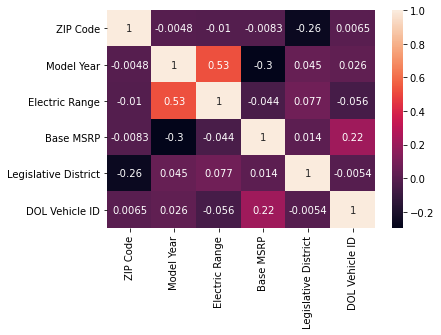

In [29]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, 
            annot=True)

Conclusion- 
1. Linear relationship between all the variables
2. Correlation between same variable remain constant, i.e, 1

**Visualization of county with highest number of cars**

In [30]:
# print('Counties:',file['County'].unique())
county= file['County'].unique()
county

array(['King', 'Clark', 'Kitsap', 'Island', 'Pierce', 'Thurston',
       'Walla Walla', 'Yakima', 'Grays Harbor', 'Whatcom', 'Skagit',
       'Mason', 'Snohomish', 'Lewis', 'Lincoln', 'San Juan', 'Cowlitz',
       'Spokane', 'Benton', 'Pacific', 'Jefferson', 'Clallam', 'Chelan',
       'Douglas', 'Asotin', 'Grant', 'Whitman', 'Stevens', 'Okanogan',
       'Franklin', 'Kittitas', 'Skamania', 'Klickitat', 'El Paso',
       'Columbia', 'Virginia Beach City', 'Wahkiakum', 'Adams', 'Ferry',
       'Pend Oreille', 'Fairfax', 'Garfield', 'Nueces', 'Cobb',
       'Los Angeles', 'Bexar', 'San Diego', 'Banks', 'Leavenworth',
       'San Luis Obispo', 'Anne Arundel', 'Maricopa', 'Placer', 'Charles',
       'Elko', 'Chesapeake City', 'Passaic', 'New London', nan, 'Fulton',
       'Dekalb', 'Arlington', 'Montgomery', 'Monroe', 'Ventura',
       'Washington', 'Denton', 'Cumberland'], dtype=object)

In [31]:
#Converting to string for plotting
county = county.astype(str)

In [32]:
noCars = []
for i in range(len(county)):
    noCars.append(len(file[file['County']== county[i]]))
    
print(noCars)

[33012, 3221, 2136, 745, 4375, 2379, 147, 283, 233, 1669, 697, 293, 6404, 227, 12, 427, 285, 1328, 706, 69, 405, 419, 343, 124, 32, 155, 100, 75, 79, 145, 163, 45, 100, 2, 7, 1, 13, 14, 10, 11, 4, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1]


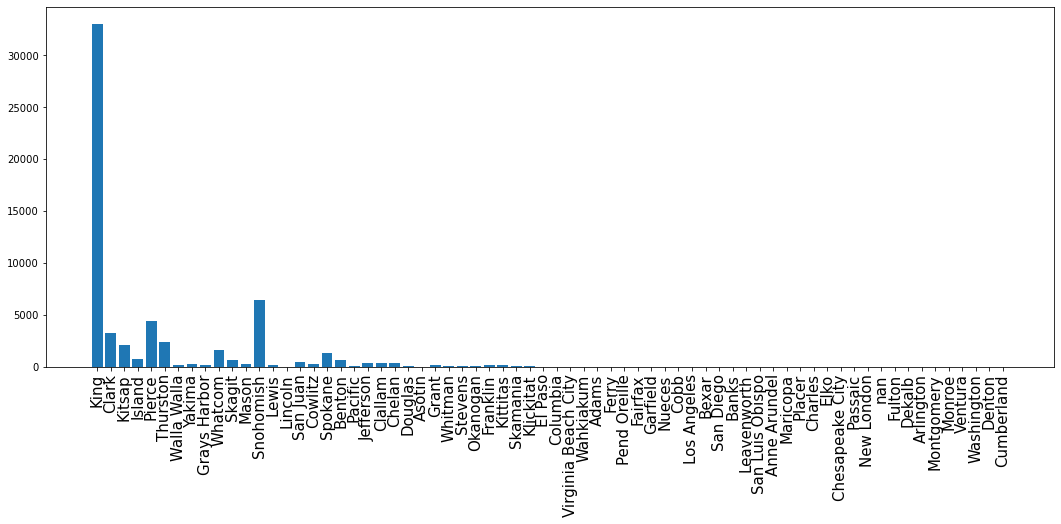

In [33]:
#County with highest number of cars                         #References- https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
fig = plt.figure()                                                   #- https://stackoverflow.com/questions/29766827/matplotlib-make-axis-ticks-label-for-dates-bold
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(county,noCars, )
fig.set_size_inches(14, 5)
ax.xaxis.set_tick_params(labelsize=15)
plt.show()
fig.savefig('test2png.png', dpi=100)

Conclusion- Highest number of cars are owned in the county King

**Visualization of city with highest number of cars**

In [34]:
city=file['City'].unique()
print('Cities:', city)

Cities: ['KENT' 'COVINGTON' 'CAMAS' 'SEATTLE' 'BREMERTON' 'KIRKLAND' 'OAK HARBOR'
 'SAMMAMISH' 'MERCER ISLAND' 'TACOMA' 'ISSAQUAH' 'OLYMPIA' 'ROCHESTER'
 'BELLEVUE' 'MEDINA' 'WALLA WALLA' 'YAKIMA' 'RIDGEFIELD' 'VANCOUVER'
 'ELMA' 'POULSBO' 'BELLINGHAM' 'UNIVERSITY PLACE' 'CAMANO ISLAND' 'RENTON'
 'CLYDE HILL' 'ANACORTES' 'HOODSPORT' 'SEATAC' 'STANWOOD' 'BEAUX ARTS'
 'BLAINE' 'BONNEY LAKE' 'REDMOND' 'EDGEWOOD' 'SNOQUALMIE' 'KENMORE'
 'RAVENSDALE' 'PACKWOOD' 'MONROE' 'DEER MEADOWS' 'LOPEZ ISLAND'
 'GIG HARBOR' 'SHORELINE' 'NORTH BEND' 'LONGVIEW' 'FEDERAL WAY' 'AUBURN'
 'CLINTON' 'MUKILTEO' 'BOTHELL' 'SULTAN' 'SPOKANE' 'LA CONNER'
 'FOX ISLAND' 'GRAHAM' 'LA CENTER' 'DUVALL' 'PUYALLUP' 'BAINBRIDGE ISLAND'
 'RICHLAND' 'DUPONT' 'MOUNT VERNON' 'CARNATION' 'LYNNWOOD' 'WOODINVILLE'
 'RAINIER' 'MONTESANO' 'BATTLE GROUND' 'PORT ORCHARD' 'LACEY'
 'SPOKANE VALLEY' 'LAKE FOREST PARK' 'COUPEVILLE' 'LONG BEACH'
 'PORT LUDLOW' 'NEWCASTLE' 'EDMONDS' 'SEQUIM' 'CASHMERE' 'SPANAWAY'
 'ORONDO' 'SNOHOMISH' '

In [35]:
#Converting to string for plotting
city = city.astype(str)

In [36]:
noCity = []
for i in range(len(city)):
    noCity.append(len(file[file['City']== city[i]]))
    
print(noCity)

[766, 144, 454, 11680, 410, 2032, 175, 1848, 992, 1336, 1051, 1587, 39, 3343, 154, 116, 187, 200, 1998, 20, 277, 1170, 254, 174, 1357, 134, 256, 19, 116, 154, 21, 144, 235, 2611, 89, 318, 402, 33, 5, 219, 1, 70, 630, 741, 246, 119, 457, 614, 90, 279, 1727, 29, 827, 35, 73, 111, 68, 225, 542, 710, 320, 53, 245, 130, 717, 999, 19, 35, 191, 344, 352, 179, 237, 98, 11, 58, 326, 729, 249, 24, 122, 21, 699, 8, 395, 43, 282, 132, 22, 211, 82, 92, 114, 32, 63, 9, 80, 25, 176, 292, 19, 45, 235, 17, 195, 821, 8, 283, 50, 88, 23, 165, 195, 70, 24, 114, 319, 84, 63, 294, 4, 36, 6, 15, 94, 139, 58, 98, 5, 54, 99, 133, 24, 221, 78, 30, 53, 24, 135, 42, 107, 8, 86, 13, 94, 13, 139, 3, 52, 75, 27, 75, 156, 8, 56, 20, 37, 2, 127, 9, 23, 12, 9, 28, 73, 28, 5, 55, 18, 18, 111, 106, 262, 21, 17, 52, 44, 32, 21, 3, 12, 10, 14, 38, 48, 8, 65, 27, 47, 82, 130, 26, 8, 23, 6, 3, 61, 7, 26, 29, 12, 2, 14, 2, 9, 24, 10, 13, 13, 12, 10, 12, 1, 30, 18, 12, 33, 5, 5, 9, 9, 19, 44, 2, 4, 19, 52, 38, 8, 1, 9, 5, 24, 

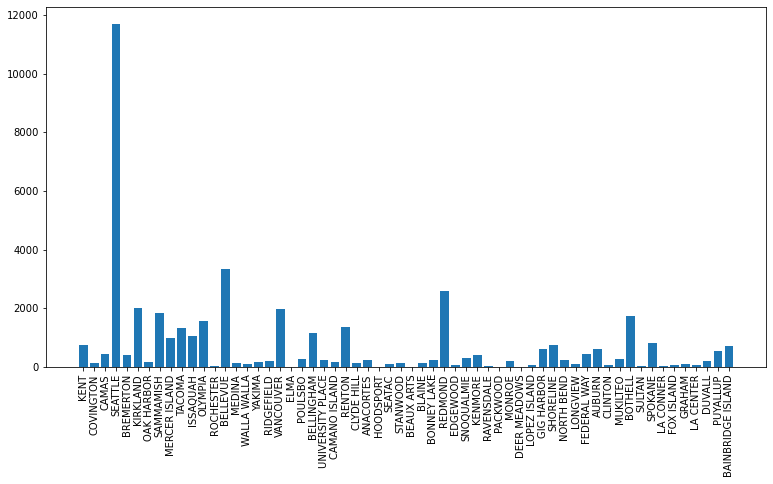

In [37]:
#City with highest number of cars
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1, 1])
plt.xticks(rotation=90)
ax1.bar(city[:60],noCity[:60] )
fig1.set_size_inches(10, 5)
ax1.xaxis.set_tick_params(labelsize=10)
plt.show()
fig1.savefig('test3png.png', dpi=100)

Conclusion- Highest number of cars are owned in Seattle of the state Washington.

**Pairplot of the dataframe**

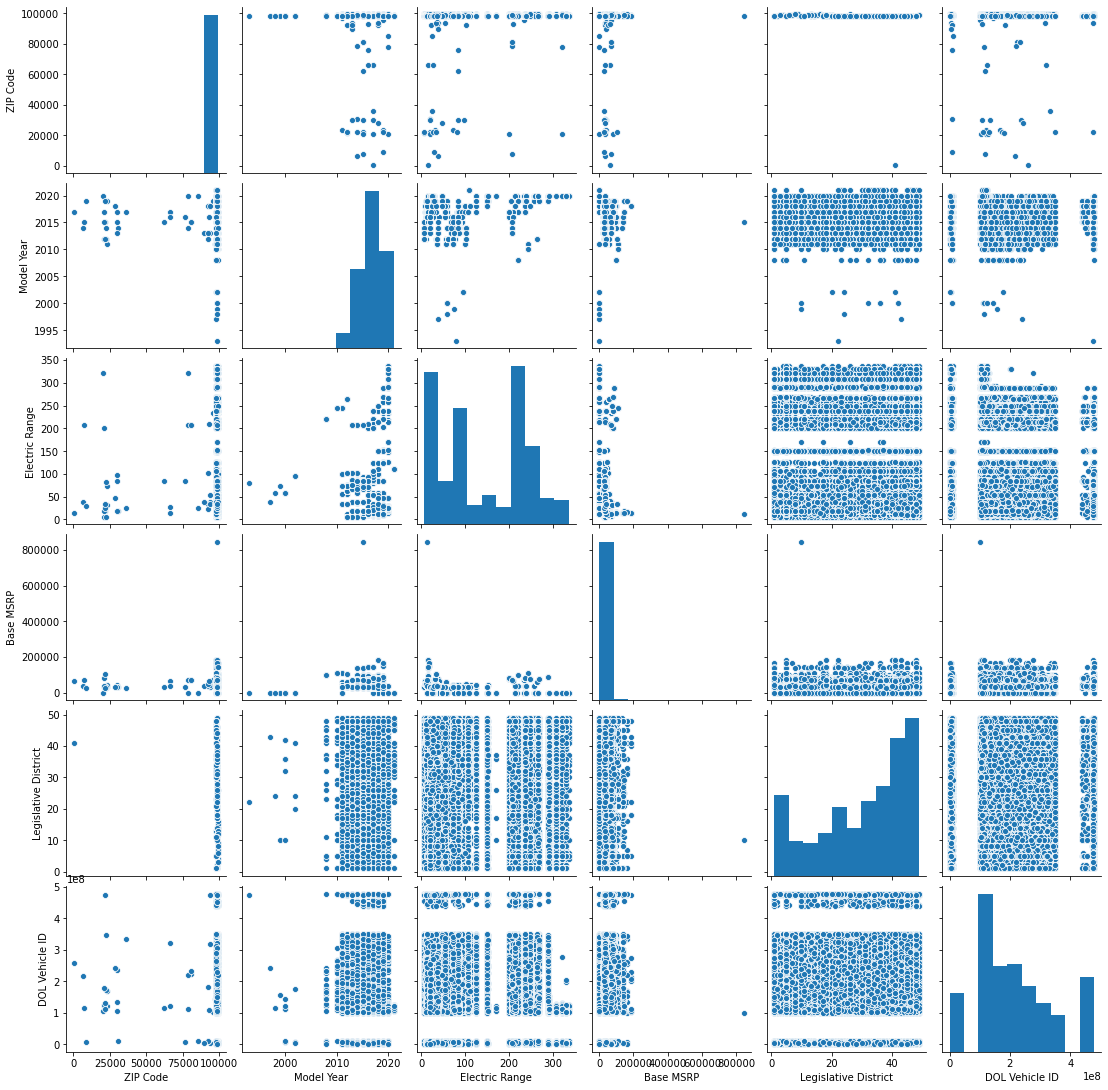

In [38]:
sns.pairplot(file)

Conclusion- The pairplot plot represents a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. 

**Relation plot(relplot) based on Electric Vehicle type**

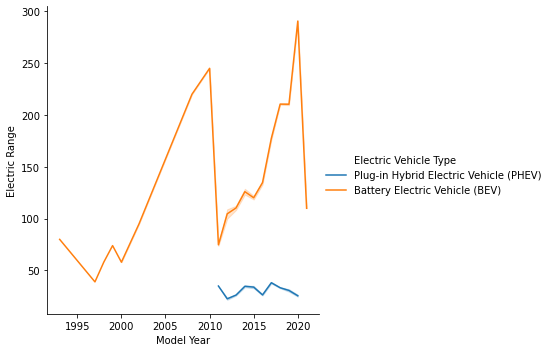

In [39]:
sns.relplot(x='Model Year', y='Electric Range', hue='Electric Vehicle Type', kind="line", data=file)     # Reference- https://seaborn.pydata.org/generated/seaborn.relplot.html

From the above visualization following can be concluded,
1. Battery Electric Vehicle(BEV) type is most commonly used.
2. Cars of model year closer to 2020 have higher electric range.
3. Plug-in Hybrid Electric Vehicle(PHEV) are used to a minimum, and has very less electric range.


**Distribution plot for Model Year**

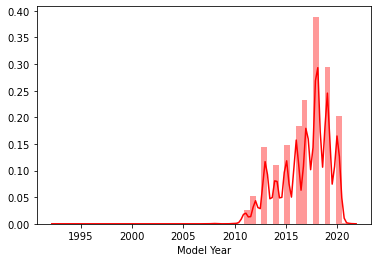

In [40]:
sns.distplot(file['Model Year'], color="r", bins=50)
#Mostly used models are between the year 2015 and 2020

**Categorical plot for Model Year**

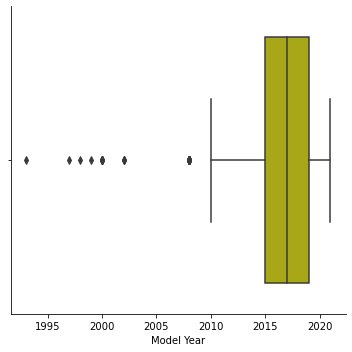

In [41]:
sns.catplot(x='Model Year', kind='box', data=file, color='y')

**Histogram plot**

(array([1.0000e+00, 2.0000e+00, 8.0000e+00, 3.0000e+00, 0.0000e+00,
        2.3000e+01, 2.6760e+03, 1.3752e+04, 2.7493e+04, 1.6970e+04]),
 array([1993. , 1995.8, 1998.6, 2001.4, 2004.2, 2007. , 2009.8, 2012.6,
        2015.4, 2018.2, 2021. ]),
 <a list of 10 Patch objects>)

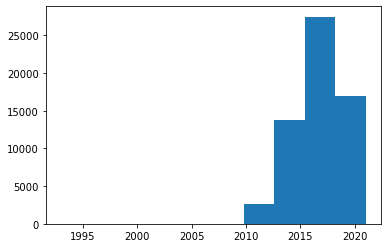

In [42]:
num_bins= 10
plt.hist(file['Model Year'], num_bins)

From the above distribution, categorical, and histogram visualizations, it can be concluded that the model cars manufactured between 2015 and 2020 are mostly used.

**Regression model of Base MSRP vs Electric Range**

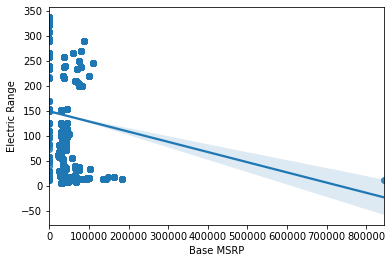

In [43]:
sns.regplot(file['Base MSRP'], file['Electric Range'])

Conclusion- There are many outliers that are away from the regression line implying weak relation between Electric Range and Base MSRP

**Histogram representation of the dataframe**

In [ ]:
file.hist(bins=50)

**Joint distributions on Model Year vs Electric Range**

In [ ]:
data = pd.DataFrame(file, columns=['Model Year', 'Electric Range'])
with sns.axes_style('white'):
    sns.jointplot("Model Year", "Electric Range", file, kind='kde');

**Choromap Plot**  

In [ ]:
#Reference- https://www.kdnuggets.com/2020/09/geographical-plots-python.html
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = file['County'],
        z = file['ZIP Code'],
        text = file['County'],
        colorbar = {'title' : 'ZIP Code'},
      )


In [ ]:
layout = dict(title = 'ZIP Code',
              geo = dict(projection = {'type':'mercator'})
             )

In [ ]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

Other References-
- https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
- https://seaborn.pydata.org/generated/seaborn.distplot.html
- https://seaborn.pydata.org/introduction.html
- https://towardsdatascience.com/exploratory-data-analysis-with-pandas-508a5e8a5964